#**Systems Simulation: Stochastic Generators and White Noise**

```
INF301 – Systems Modeling and Simulation
Prof. Luiz Henrique Bonani
Week 03
```





# Stochastic Generators

It is traditional to describe nature in deterministic terms. However, neither nature nor engineered systems behave in a way that can be strictly predicted.

Systems are often subject to "noise" and so, to model a system realistically, a certain degree of randomness must be incorporated into the model. Although one cannot predict exactly what will happen next, one can predict how they will be distributed.

## Goal
In this lesson, we consider a set of reverse engineering problems. Instead of using traditional data analysis, where mean, standard deviation and other parameters are calculated from given data, we aim to generate certain data with certain statistical parameters.

The reason for this is to have realistic input signals for the models created.
For example, in climatological models the actual temperature profile will vary from year to year, but its statistics will be approximately stationary.

# Uniformly Distributed Random Numbers

Most language compilers have the facility to generate random numbers that are uniformly distributed in the interval [0,1[ . In Python this can be achieved through the random_sample() in Numpy library command.

This means that in 100 calls to this function, approximately 10% will be between 0 and 0.1; another 10% between 0.1 and 0.2, etc.

Most random generators are based on Linear Congruential Generators (LCG) and are deterministic like any procedure that follows an algorithm.



## LCG
These generators determine a seemingly unpredictable sequence, but one that requires a seed $Z_0$ to begin with.

This seed and the successive terms are recursively applied to the formula, and $Z_k$ is normalized to produce the output $U_k$, which is statistically uniform over the range $0 ≤ U_k < 1$.

Formally, the sequence is generated as follows, where a, c, and m are referred to as the multiplier, increment, and modulus, respectively. The mod operation is called the modulus.

$$Z_0 = "seed" $$

$$Z_{k+1} = (aZ_k + c) mod(m)$$

$$U_k = Z_k + m$$

# Example 1

Determine the sequence of numbers generated by an LCG with $a = 5$, $c = 3$, $m = 16$ and $Z_0 = 7$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 20; Z0 = 7; a = 5; c = 3; m = 16;
Z = np.zeros(N); U = np.zeros(N)
Z[0] = Z0; U[0] = Z0/m;

for i in range(N - 1):
    Z[i+1] = (a*Z[i]+c) % m
    U[i+1] = Z[i+1]/m

R = [Z,U]
print("R = ")
print(np.transpose(R))

R = 
[[ 7.      0.4375]
 [ 6.      0.375 ]
 [ 1.      0.0625]
 [ 8.      0.5   ]
 [11.      0.6875]
 [10.      0.625 ]
 [ 5.      0.3125]
 [12.      0.75  ]
 [15.      0.9375]
 [14.      0.875 ]
 [ 9.      0.5625]
 [ 0.      0.    ]
 [ 3.      0.1875]
 [ 2.      0.125 ]
 [13.      0.8125]
 [ 4.      0.25  ]
 [ 7.      0.4375]
 [ 6.      0.375 ]
 [ 1.      0.0625]
 [ 8.      0.5   ]]


# Sequence
Serious simulations require a large number of non-repeating random numbers. Repetition cannot be tolerated, since when a pseudorandom sequence repeats, the entire sequence repeats from that point on.

There are a number of different generators used on real computers. One of the earliest, the UNIVAC 1100 series, used $a = 5^{15}$ , $m = 36$ and $c = 0$. More modern systems use $a = 7^5 = 16,807$, $c = 0$ and $m = 2^{31} – 1 = 2,147,483,647$.

See: Mersenne Twister.



# Statistical Properties of Generators
In addition to having a large period and a modulus chosen for calculations on real computers, a generator $U[0,1[$ should behave well in a statistical sense.
These behaviors will be satisfactory if two conditions are met:
1. The generators must be uniform, meaning that the proportion of numbers generated in any interval of length L must be close to the proportion in any other interval of length L.
2. The sequence must be independent, meaning that the numbers should not appear to influence each other.



# Statistical Test of Uniformity

To test the property of uniformity, one can apply the chi-square test $(χ^2)$ which associates intervals and theoretical and empirical frequencies of occurrence.

Thus, partitioning the interval $[0,1[$ into $m$ subintervals $[0,1/m[,[1/m,2/m[,...,[(m-1)/m,1[$, each with length $1/m$.

Generating n random numbers, there is a frequency associated with each of the m classes: $f1, f2, ..., fm$, which can be compared with the expected frequencies $e_k = n/m$ for each class.

The chi-square test determines:

$$ \chi^{2}=\sum_{k=1}^{m} \frac{\left(f_{k}-e_{k}\right)^{2}}{e_{k}}=\frac{m}{n} \sum_{k=1}^{m}\left(f_{k}-\frac{n}{m}\right)^{2} $$

with $v = m – 1$ degrees of freedom.


## The Chi-square distribution function

<center>

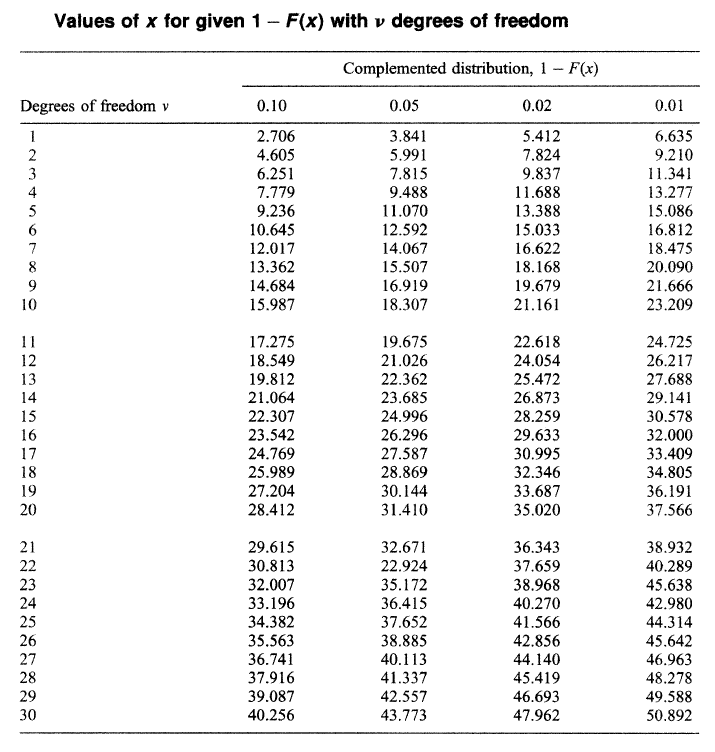
</center>



# Example 2
A generator $U[0,1[$ is tested by generating 100 numbers and counting the frequencies in each of the intervals:

$$[0.00, 0.25[, [0.25, 0.50[, [0.50, 0.75], [0.75,1.00[,$$

with the following results: $f1 = 21, f2 = 31, f3 = 26$ and $f4 = 22$. The question is whether the result is good enough to be considered uniform.

**Solution**:

There are $n = 100$ samples and $m = 4$ classes. Obviously, the theoretical result would be $n/m = 25$ samples in each class, but this is not the case.

Applying the Chi-square test: $χ^2 = 4/100 [(21-25)^2+(31-25)^2+(26-25)^2+(22-25)^2] = 2.48$, with $v = 4 – 1 = 3$.

From the previous table, $χ_c^2 = 7.81$ for the confidence level $α = 95%$.

Since $χ^2 < χ_c^2$, the hypothesis that the distribution is uniform is accepted. The value $p = 1 – α$ is called the significance level.

In practice, one should look for more precision, with at least $m = 100$ classes and $n = 1000$ would not be too much. In this case, with many degrees of freedom, $v$, the table can be abandoned to use an asymptotic formulation for $χ^2$, where $z_c$ is the $1 – α$ asymptotic formulation:

$$ \chi^{2}=v\left(1-\frac{2}{9 v}+\frac{z_{c}}{3} \sqrt{\frac{2}{v}}\right)^{3} $$

This procedure can be carried on using the library scipy from Python.

In [12]:
import numpy as np
import scipy.stats as ss

# Hypothesis H0: the result is good enough to be considered uniform
n = 100
m = 4
alpha = 0.95 # confidence interval

f_obs = np.array([21, 31, 26, 22])
f_exp = np.array([n/m, n/m, n/m, n/m])
v = len(f_obs) - 1 # degrees of freedom

# Chi2 critical value
Chi2_crit = ss.chi2.ppf(alpha, v)

Chi2e = m/n*sum((f_obs-f_exp)**2)
print("v = %d, Chi2 = %.2f, Chi2c = %.2f"%(v,Chi2e,Chi2_crit))

if Chi2e >= Chi2_crit:
	print("Reject hypothesis H0")
else:
	print("Accept hypothesis H0")

# Using scipy.stats library:
print("======================================")
print("      Using scipy.stats library       ")
print("======================================")
Chi2t = ss.chisquare(f_obs, f_exp)[0]
print("Chi2 = ",Chi2t)

if Chi2t >= Chi2_crit:
	print("Reject hypothesis H0")
else:
	print("Accept hypothesis H0")

v = 3, Chi2 = 2.48, Chi2c = 7.81
Accept hypothesis H0
      Using scipy.stats library       
Chi2 =  2.48
Accept hypothesis H0


#Statistical Test of Independence

To test the independence of a sequence of random numbers, the run test is used, which outputs a frequency vector indicating the number of samples followed in increasing progression, r. The vector $r = [r_1, r_2, ..., r_6]$ has 6 positions, where $r_1$ is the number of times in the sequence in which successive and increasing samples have  length 1, $r_2$ is the number of times in the sequence, in which successive and increasing samples have length 2, and so on.

For instance, in the sequence 5, 3, 6, 9, 8, 7, there are three runs of length 1 (5, 8 and 7) and one run of length 3 (3, 6, 9). With the vector r, the test variable *R* is calculated, which is
approximately a chi-square distribution with 6 degrees of freedom (v = 6).

## Calculation of the R test variable

The test variable R can be calculated from the following
formulas:

$$
R=\frac{1}{n}(\mathbf{r}-n \mathbf{B}) \mathbf{A}(\mathbf{r}-n \mathbf{B})^{T}
$$

with:

$$
\begin{aligned}
&\mathbf{A}=\left[\begin{array}{cccccc}
4529 & 9045 & 13568 & 18091 & 22615 & 27892 \\
9045 & 18097 & 27139 & 36187 & 45234 & 55789 \\
13568 & 27139 & 40721 & 54281 & 67852 & 83685 \\
18091 & 36187 & 54281 & 72414 & 90470 & 111580 \\
22615 & 45234 & 67852 & 90470 & 113262 & 139476 \\
27892 & 55789 & 83685 & 111580 & 139476 & 172860
\end{array}\right], \\
&\mathbf{B}=\left[\begin{array}{lllllll}
1 / 6 & 5 / 24 & 11 / 120 & 19 / 720 & 29 / 5040 & 1 / 840
\end{array}\right]
\end{aligned}
$$

It is recommended that the run test be
applied to sequences with at least $n = 4000$.
The vector $r$ can be obtained by the code shown.

## Example 3

A random number generator produces a sequence with
$n = 10000$ supposedly random samples. These samples were
used to generate the vector **r** from the *runTest* function shown
previously, with the following result:

$$r = \begin{bmatrix}
1670& 2147 & 891 & 262 & 52 & 9
\end{bmatrix}$$

Would the generated sequence pass the independence test?

**Solution**:

First, we must calculate the variable R, which, using the
following code with the values ​​from the problem, returns R = 3.9604. Since
for $v = 6$ and $α = 90\%$, $χ_c^2 = 10.645$. Thus, $R < χ_c^2$ and it can be accepted that the sequence is considered independent with 90% confidence.

In [13]:
import numpy as np
import scipy.stats as ss

# define the function for the run test:

def runTest(s):
  r = np.zeros(6)
  lgt = 1
  for i in range(1,len(s)):
    if (s[i]>s[i-1]):
     if (lgt < 6):
       lgt+=1
     else:
       lgt = 6
       if (i == len(s) - 1):
         r[lgt-1]+=1
    else:
     r[lgt-1]+=1
     lgt = 1
     if (i == len(s) - 1):
       r[lgt-1]+=1
  return r

print("Run Test")
# Test the run test function for the example in the class
seq = np.array([5, 3, 6, 9, 8, 7])
r = runTest(seq)
print("sequence: ",seq)
print("r = ",r)

print()
print("===================================================")
print("Example 3")
# Example 3

A = np.array([
              [4529, 9045, 13568, 18091, 22615, 27892],
              [9045, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]
])
B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])
print("A = ",A)
print("B = ",B)

# Hypothesis H0: sequence can be considered independent with (alpha*100)% confidence

n = 10000
v = 6
alpha = 0.90
r = np.array([1670, 2147, 891, 262, 52, 9])

Chi2_crit = ss.chi2.ppf(alpha, v)

R = 1/n*np.matmul(np.matmul((r-n*B),A),(r-n*B).T)
print("R = ",R," Chi2c = ",Chi2_crit)

if R >= Chi2_crit:
   print("Reject hypothesis H0")
else:
   print("Accept hypothesis H0")

Run Test
sequence:  [5 3 6 9 8 7]
r =  [3. 0. 1. 0. 0. 0.]

Example 3
A =  [[  4529   9045  13568  18091  22615  27892]
 [  9045  18097  27139  36187  45234  55789]
 [ 13568  27139  40721  54281  67852  83685]
 [ 18091  36187  54281  72414  90470 111580]
 [ 22615  45234  67852  90470 113262 139476]
 [ 27892  55789  83685 111580 139476 172860]]
B =  [0.16666667 0.20833333 0.09166667 0.02638889 0.00575397 0.00119048]
R =  3.960377828168133  Chi2c =  10.644640675668422
Accept hypothesis H0


## Non-Uniform Random Number Generation

In practice, it is reasonable to assume that a good generator $U[0,1[$ is available. What matters then is to generate numbers in an arbitrary statistical distribution.

There are several methods for this, including the Formulation Method, the Rejection Method, and the Convolution Method.

Certain random variables can be expressed simply using generators $U[0,1[$. If this generator is RND, it is possible to establish a sequence of random numbers $X$ that are uniformly distributed in the arbitrary interval $[a,b[$:

$$X=(b-a)\mathrm{RND}+a$$

In this case, it can be shown that the mean $μ = (a + b)/2$ and the variance is $σ^2 = (b – a)^2/12$.

## Formulation Method

There are also formulas for non-uniform distributions.

For example, a normalized Gaussian random variable
can be obtained by the formula:

$$
Z=\sqrt{-2 \ln (\mathrm{RND})} \cos (2 \pi \mathrm{RND})
$$

where Z is a random variable with a mean of 0 and a standard deviation of 1.

In general, a Gaussian variable with mean μ and standard deviation σ is required. A standardized variable X can then
be obtained from Z by applying the linear transformation:

$$X = σZ + μ$$

## Rejection Method

Unfortunately, finding an explicit formulation for a distribution function is not always possible.

Some random variables with Gaussian and Beta distributions must be generated from the so-called rejection algorithm, which is associated with the idea of ​​playing darts.

The algorithm begins by selecting a sequence of points that fall within a target area, contained in a rectangle
$a ≤ x ≤ b$ and $0 ≤ y ≤ c$. The points that fall within the curve
shown below are legitimate random variables that follow the distribution.

The random points are $(x,y)$. Since only the points under the curve
are selected, in the example shown, the points *A*, *D*
and *E* are ignored.

<center>

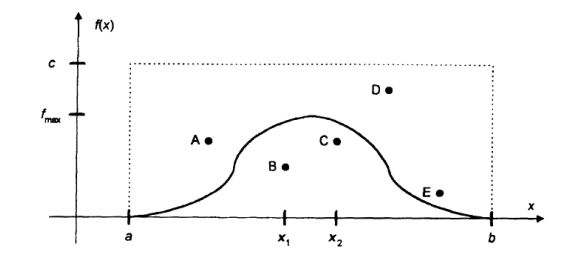

</center>

## Example 4

Apply the rejection method to generate 100 random values ​​for the Beta distribution, with $a = 3$ and $b = 2$.

**Solution**: The Beta density function is given by:

$$
\begin{aligned}
f(x) &=\frac{\Gamma(a+b+2)}{\Gamma(a+1) \Gamma(b+1)} x^{a}(1-x)^{b}=\frac{\Gamma(7)}{\Gamma(4) \Gamma(3)} x^{3}(1-x)^{2} \\
&=60 x^{3}(1-x)^{2}, \quad 0 \leq x \leq 1
\end{aligned}
$$

$$
\Gamma(x)=\left\{\begin{array}{c}
(x-1) \Gamma(x-1), x>2 \\
\Gamma(x+1) / x, x<1
\end{array}, \quad \Gamma(1)=1\right.
$$

By applying the following algorithm, 100 points of the
Beta distribution can be generated.

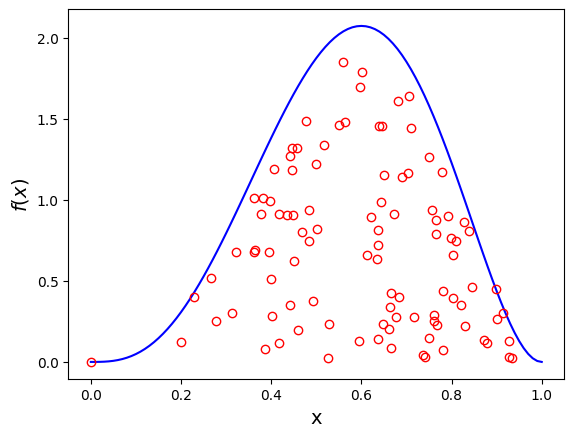

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
A = np.zeros((N,2))

for i in range(N - 1):
    x = np.random.random_sample()
    y = 2.1 * np.random.random_sample()
    while (y > 60 * x**3 * (1-x)**2):
        x = np.random.random_sample()
        y = 2.1 * np.random.random_sample()
    A[i,0] = x; A[i,1] = y;

X = np.arange(0,1.01,0.01)
F = 60*X**3*(1-X)**2;

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(X, F,"b-")
plt.plot(A[:,0], A[:,1],"ro",mfc='none')
plt.xlabel("x",fontsize=14)
plt.ylabel(r"$f(x)$",fontsize=14)
plt.show()

## Convolution Method

We now consider the case of random variables $X$ defined
as the sum of $n$ other Independent and Identically Distributed (IID) random variables.

If $X$ has the same density function $f_i(x)~\mathrm{for}~ i = 1, 2, ... N$,
the density function $f(x)$ for $X$ is the convolution of each
of the base density functions.

Formally:

$$
\begin{gathered}
X=\sum_{k=1}^{n}
f_{1}(x) \otimes f_{2}(x)=\int_{-\infty}^{\infty} f_{1}(\lambda) f_{2}(x-\lambda) d \lambda
\end{gathered}
$$

## *m*-Erlang Case

A specific case is the *m*-Erlang distribution, which is by
definition, the sum of *m* IID exponential random variables.

The mean of an *m*-Erlang distribution is

$$
\mu=E\left[\sum_{k=1}^{m} X_{k}\right]=\sum_{k=1}^{m} E\left[X_{k}\right]=m / \lambda
$$

where *λ* is the reciprocal of the exponential distribution.

An algorithm for generating an *m*-Erlang distribution with
mean *μ* by adding *m* exponential random variables is shown below.

In [ ]:
import numpy as np

m = 10
mu = 1
x = np.zeros(m)
x[0] = 1

for i in range(1,m):
  x[i] = x[i-1] - mu*np.log(np.random.random_sample())/m

print(x)

[1.         1.10073751 1.19435248 1.36028386 1.37948883 1.45926519
 1.54776202 1.62499884 1.83715584 1.8532566 ]


## Example *m*-Erlang Algorithm

Generate a sequence of 1000 2-Erlang random variables with mean 5 and compare
them with the expected results.

The mean is $2 / \lambda=5 \rightarrow \lambda=2 / 5=0.4$.
$$
\begin{aligned}
&f(x)=\left\{\begin{array}{l}
0, & x<0 \\
\frac{\lambda^{m} x^{m-1} \exp (-\lambda x)}{(m-1) !}
\end{array}, x \geq 0\right. \\
&f(x)=\frac{4}{25} x \exp (-2 x / 5), \quad x \geq 0
\end{aligned}
$$

The convolution method says that the random variable is the sum of *-2.5 ln(RND)* and *-2.5 ln(RND)*, which is algebraically equivalent to *-2.5 ln(RNDxRND)*.

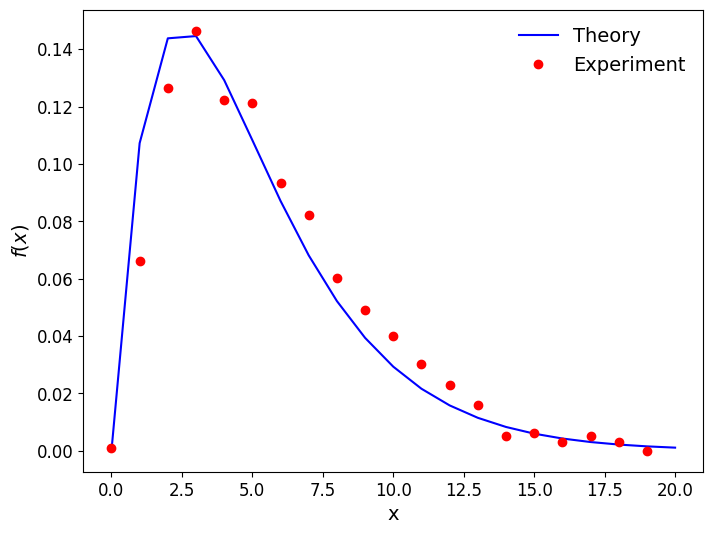

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000; M = 20
x = np.zeros(N)

for i in range(N - 1):
    x[i+1] = -2.5*np.log(np.random.random_sample() * np.random.random_sample())

xx = np.arange(0,M,1); fx = np.zeros(M)
for i in range(M - 1):
    fx[i] = len(np.argwhere( (x > i-1) & (x <= i)))

fx = fx / sum(fx)
T = np.arange(0,M+1,1)
F = 4/25*T*np.exp(-2.*T/5)

# Figura
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(T,F,"b-",label="Theory")
plt.plot(xx,fx,"ro",label="Experiment")
plt.xlabel("x",fontsize=14)
plt.ylabel(r"$f(x)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()

## Generating Arbitrary Random Values

In practical situations, there may not be explicit formulas for the density function. For example, there is no theoretical model for the annual temperature in a city; however, historical temperature data are well-documented.

Therefore, it is interesting to be able to create a series of random values that have the same statistics as the historical data.

Since the inputs are random processes, the statistics of the generated data must align with those of the historical data.

To generate these arbitrary values, one proceeds with a two-step process: 1. First, one must consider a data set ${x_1, x_2, ... x_n}$ presented in ascending order. From this data, one can derive a distribution function $F(x)$ that is approximately linear and continuous and fits the data perfectly. This is done by the formula:

$$
F(x)=\left\{\begin{array}{l}
0, \quad x<x_{1} \\
\frac{i-1}{n-1}+\frac{x-x_{i}}{(n-1)\left(x_{i+1}-x_{i}\right)}, x_{i} \leq x<x_{i+1} \quad x \geq x_{n}
\end{array} \quad i=1,2, \cdots, n-1\right.
$$

2. Second, we need to find $F^{-1}(x)$. This can be done because $F(x)$ is quasi-linear and continuous, using $X = F^{-1}(RND)$.

## Example 5

Consider the following ordered set of random observations of an unknown process: ${1, 2, 4, 5, 7, 7, 9}$.

Find the distribution function and its inverse.

**Solution**:

The problem has n = 7 points. Using the previous formula,
for $x < 1, F(x) = 0$. For $i = 1, 1 ≤ x < 2$,

$$
F(x)=\frac{1-1}{7-1}+\frac{x-1}{(7-1)(2-1)}=\frac{1}{6}(x-1)
$$

Similarly, for $i = 2, 2 ≤ x < 4$,

$$
F(x)=\frac{2-1}{7-1}+\frac{x-2}{(7-1)(4-2)}=\frac{1}{12}x
$$
And following the algorithm, we determine F(x).

$$
F(x)= \begin{cases}0, & x<1, \\ \frac{1}{6}(x-1), & 1 \leqslant x<2 \\ \frac{1}{12} x, & 2 \leqslant x<4 \\ \frac{1}{6}(x-2), & 4 \leqslant x<5 \\ \frac{1}{12}(x+1), & 5 \leqslant x<7 \\ \frac{1}{12}(x+3), & 7 \leqslant x<9 \\ 1, & x \geqslant 9\end{cases}
$$

A graph of $F(x)$ is shown below.

<center>

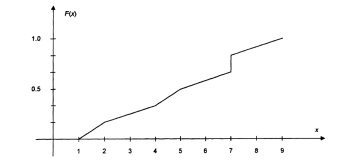

</center>

Now, it is necessary to invert $F(x)$. To do so, it must be remembered that $y = F^{-1}(x)$, which must be done for each case illustrated. For example, in case 2, $y = F(x) = 1/6(x-1)$ for $1 ≤ x < 2$. This leads to $x = 6y + 1$. Then, $F^{-1}(x) = 6x + 1$. It is also necessary to reestablish the intervals. For example, in case 2, $x = 1$ leads to $y = 0$ and $x = 2$ leads to $y = 1/6$, therefore, $0 ≤ y ≤ 1/6$.

By completing the six cases, one can make $F^{-1}(x)$ explicit:

$$
F^{-1}(x)=
\begin{cases}
\mathrm{undefined}, & x<0, \\
6x+1, & 0 \leqslant x<\frac{1}{6}, \\
12 x, & \frac{1}{6} \leqslant x<\frac{1}{3}, \\
6x+2, & \frac{1}{3} \leqslant x< \frac{1}{2}, \\
12x+1, & \frac{1}{2} \leqslant x< \frac{2}{3}, \\
7, & \frac{2}{3} \leqslant x< \frac{5}{6}, \\
12x-3, & \frac{5}{6} \leqslant x< 1, \\
\mathrm{undefined}, & x \geqslant 1.
\end{cases}
$$

<center>

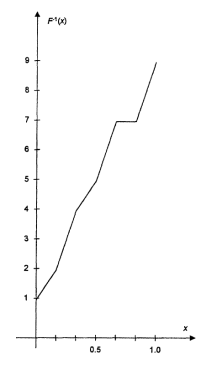

</center>

The results of 1000 random values ​​generated from this method are shown in the following figures. Simulated results can be obtained for discrete distributions.

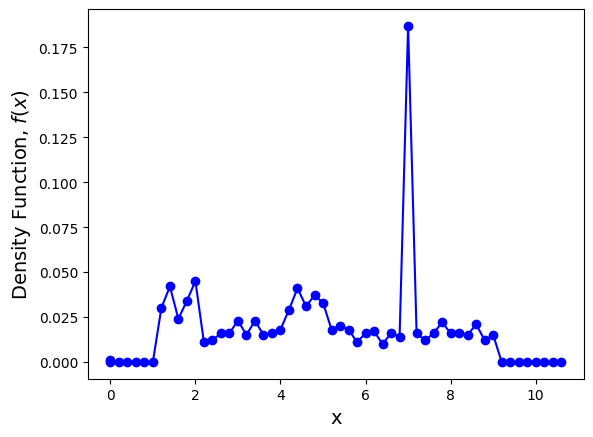

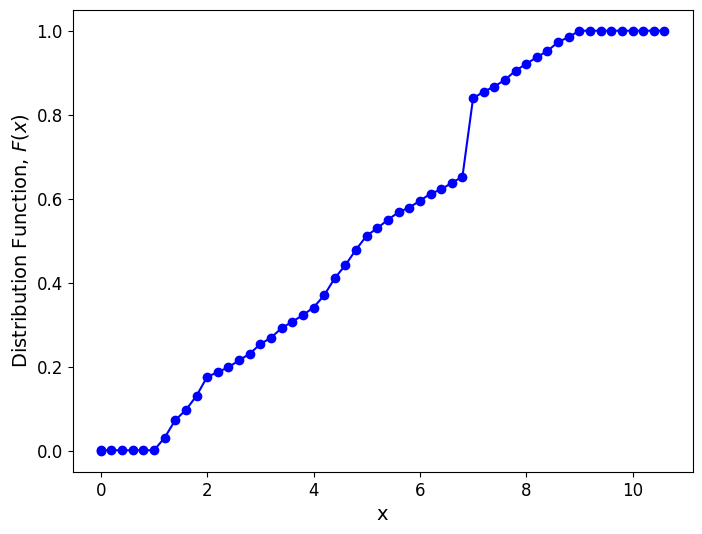

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N=1000
X = np.zeros(N)

for i in range(N-1):
    x = np.random.random_sample()
    if (x >= 0 and x < 1 / 6):
          U = 6 * x + 1
    elif (x >= 1 / 6 and x < 1 / 3):
          U = 12 * x
    elif (x >= 1 / 3 and x < 1 / 2):
          U = 6  * x + 2
    elif (x >= 1 / 2 and x < 2 / 3):
          U = 12 * x - 1
    elif (x >= 2 / 3 and x < 5 / 6):
          U = 7
    elif (x >= 5 / 6 and x < 1):
          U = 12 * x - 3;
    X[i]=U

d=0.2; M = int(11 / d)
x = np.zeros(M); fx = np.zeros(M)

for i in range(M - 1):
    x[i+1] = i * d
    fx[i+1] = len(np.argwhere((X[:] > (i-1)*d) & (X[:] <= i * d)))

fx = fx / sum(fx)
Fx = np.cumsum(fx)

# Figures
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(x,fx,'bo-')
plt.xlabel("x",fontsize=14)
plt.ylabel("Density Function, $f(x)$",fontsize=14)
plt.show()

fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(x,Fx,"bo-")
plt.xlabel("x",fontsize=14)
plt.ylabel("Distribution Function, $F(x)$",fontsize=14)
plt.show()

## Systems Modeling

When modeling a system, one of the first questions to be answered is whether simply imitating historical data is sufficient.

Indeed, in system modeling, one must understand the system's mechanism and not simply replicate experience — failure to do so risks modeling only a subset of the whole.

On the other hand, most systems have stochastic variables as inputs, and in this case, it is usually sufficient to design a model from known experience.

#Random Processes

A random process in continuous time is denoted by
$X(t)$, and each instance of $X(t)$ is denoted by $x(t)$.
Similarly, in discrete time, the process and the instances
are denoted by $X(k)$ and $x(k)$, respectively.

One way to think of it is to consider $X(t)$ as a random variable that depends on time. Thus, all the statistics, such as moments, mean, and standard deviation, are available. Of these, two are the most
important: the mean and the autocorrelation:

$$
\begin{aligned}
&\mu_{x}(t)=E[X(t)] \\
&R_{x x}(t, \tau)=E[X(t) X(t+\tau)]
\end{aligned}
$$

The autocorrelation is the expected value of the product of the signal with
itself at some point $τ$ time units later,
from which it follows that the largest value that the autocorrelation can
have is at $τ = 0$.

In general, $R_{xx}(t, τ)$ is a function of both $t$ and $τ$, but when
$R$ depends only on $τ$ the process is called autocorrelated. If, in this case, the mean $μ_{X(t)} = E[X(t)]$ is also a constant, the process is called stationary in the broad sense.

## Example 6

Consider a set of four equally likely signals
defined in the interval $[0, 1]$. Find the mean, second moment, variance, and autocorrelation of $X(t)$.

$$X(t)=\{2t+1,~t+2,~3t+2,~4t+1\}$$

**Solution**: Since each member of the set is equally likely, the expected values ​​are simply the means.

$$
\begin{gathered}
\mu=1 / 4[(4 t+1)+(2 t+1)+(t+2)+(3 t+2)]=1 / 2~(5 t+3) \\
E\left[X^{2}(t)\right]=1 / 4\left[(4 t+1)^{2}+(2 t+1)^{2}+(t+2)^{2}+(3 t+2)^{2}\right]=1 / 2\left(15 t^{2}+14 t+5\right) \\
E\left[X^{2}(t)\right]-\mu^{2}=1 / 2\left(15 t^{2}+14 t+5\right)-1 / 4(5 t+3)^{2}=1 / 4\left(5 t^{2}-2 t+1\right) \\
R_{x x}(t, \tau)=E[X(t)X(t+\tau)]=1/4[(2t+1)(2t+2\tau+1)+(t+2)(t+\tau+2)+(3t+2)(3t+3\tau+2)+(4t+1)(4t+4\tau+1)]=1 / 2\left(15 t^{2}+14\tau t+15 t+7 \tau+5\right)
\end{gathered}
$$

It can be noted that the autocorrelation evaluated at $τ = 0$ is the
second order moment: $R_{xx}(t,0) = E[X^2(t)]$.

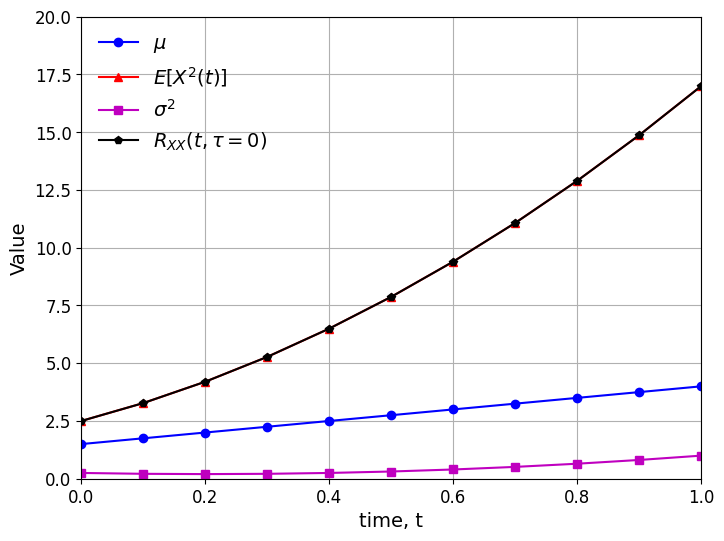

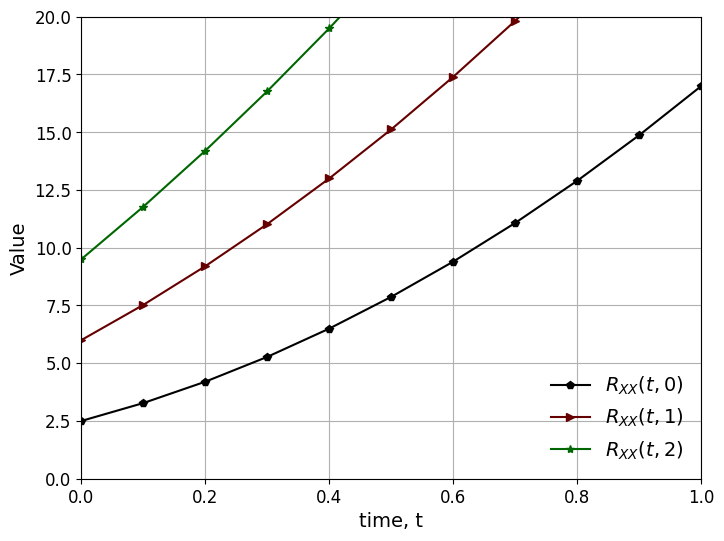

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,1.1,0.1)
mu = 0.5 * (5 * t + 3)
E2 = 0.5 * (15 * t**2 + 14 * t + 5)
sig2 = 0.25 * (5 * t**2 - 2 * t + 1)
Rxx0 = 0.5 * (15 * t**2 + 14 * t + 5)
Rxx1 = 0.5 * (15 * t**2 + 29 * t + 12)
Rxx2 = 0.5 * (15 * t**2 + 44 * t + 19)

# Figures
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t,mu,'bo-',label=r"$\mu$")
plt.plot(t,E2,'r^-',label=r"$E[X^2(t)]$")
plt.plot(t,sig2,'ms-',label=r"$\sigma^2$")
plt.plot(t,Rxx0,'kp-',label=r"$R_{XX}(t,\tau=0)$")
plt.xlabel("time, t",fontsize=14);plt.ylabel("Value",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.grid()
plt.axis([0, 1, 0, 20])
plt.show()


fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t,Rxx0,'kp-',label=r"$R_{XX}(t,0)$")
plt.plot(t,Rxx1,'>-',color=[0.4,0,0],label=r"$R_{XX}(t,1)$")
plt.plot(t,Rxx2,'*-',color=[0,0.4,0],label=r"$R_{XX}(t,2)$")
plt.xlabel("time, t",fontsize=14);plt.ylabel("Value",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.grid()
plt.axis([0, 1, 0, 20])
plt.show()

## Characterizing Random Processes

It is worth noting that random processes differ subtly from random variables.

Random variables are theoretical collections of numbers $x_i$, from which one can select an instance $X$ and ask questions about probabilities with $Pr[X=xi]$.

In the case of random processes, one has a theoretical collection of signals or functions $x_i(t)$. Thus, simulation studies are based on two analogous principles:

1. Random Values: creating a sequence of numbers (random values) following a predefined density function.

2. Random Processes: creating a sequence of signals (random processes) with a predefined autocorrelation.

## Example 7

Considering the random process defined by the recursive formula below, where $x(0) = 0$, $x(1) = 0$, and $w(k)$ is noise, defined by $w(k) = RND$, generate $m$ instances of $n + 1$ times for this process. Assume $m = 10$ and $n = 20$; Calculate
(a) the statistical average for each time instant; (b) the temporal average for each instance, considering and not considering the initial transient; (c) the average time for the autocorrelation for each instance.

$$
x(k)=w(k)-1 / 2 x(k-1)-1 / 4 x(k-2)
$$

**Solution**:

In [16]:
import numpy as np

m = 10; n = 20
x = np.zeros((m, n+1))

for i in range(np.shape(x)[0]):
    for j in range(2, np.shape(x)[1]):
        w = np.random.random_sample()
        x[i,j] = w - 0.5 * x[i,j-1] - 0.25 * x[i,j-2];

mu_v = np.mean(x,axis=0)
x_ctrans = x.T
x_strans = x_ctrans[2:np.shape(x_ctrans)[0],:];
mu_i1 = np.mean(x_ctrans,axis=0);
mu_i2 = np.mean(x_strans,axis=0);

R = np.zeros((m,3))

for i in range(np.shape(x)[0]):
    for tau in range(1,4):
        tot = 0
        for j in range(2,n-tau): # remember that in Python the first index is zero.
            tot = tot + x[i,j] * x[i,j+tau];
        R[i,tau-1] = tot/(n - tau)

print("mu_v = ",mu_v,"\n")
print("mu_i1 = ",mu_i1,"\n")
print("mu_i2 = ",mu_i2,"\n")
print("R = ",R)

mu_v =  [0.         0.         0.4117773  0.32608674 0.2500276  0.32445846
 0.18716421 0.36187984 0.28324427 0.36078859 0.28641101 0.25921284
 0.39778653 0.10446177 0.31038078 0.34119494 0.14461119 0.28164217
 0.34603572 0.15750431 0.29078439] 

mu_i1 =  [0.2333821  0.26657459 0.25005851 0.29666622 0.18437513 0.25054681
 0.26610926 0.24626955 0.29459274 0.29497397] 

mu_i2 =  [0.25794864 0.29463507 0.27638045 0.32789425 0.20378304 0.27692016
 0.29412076 0.27219266 0.32560251 0.32602386] 

R =  [[0.04752093 0.00188921 0.09986701]
 [0.02200257 0.06853934 0.10178757]
 [0.02216923 0.08473972 0.04719436]
 [0.045971   0.09584659 0.12538593]
 [0.02929214 0.00744197 0.06145015]
 [0.06036414 0.03233954 0.07759778]
 [0.04600544 0.02143488 0.09584351]
 [0.03608312 0.0585055  0.10229172]
 [0.05245213 0.06911732 0.11042357]
 [0.01028586 0.08298793 0.17414323]]


# Generating Random Processes

From a simulation perspective, random processes are random signals. There are two basic types of random signals: regular and episodic.

In the regular case, time is considered synchronous, and at each constant time fraction, a new random signal is generated.

In this case, it generates a regular random process that can be applied to both continuous time and discrete time.

The episodic case refers to instances where events do not occur at regular intervals.

When an event occurs, there is a change in the value of the signal; however, between these events, the process remains unchanged.

A deterministic or regular random process can usually represent real systems in which control is monolithic and autonomous. These systems are referred to as being temporally oriented because decisions depend exclusively on time.

Other systems may have external influences that affect their state at irregular times.

These systems are called event-driven systems since decisions depend on external influences rather than an internal state. Since, from an engineering point of view, control systems can be open-loop or closed-loop, it is a fact that open-loop systems tend to be time-driven, and closed-loop systems tend to be event-driven.

## Episodic Random Processes

Episodic random processes are characterized by non-deterministic times between events.

If these times are exponentially distributed, the process is referred to as Markov process.

* Furthermore, if $x(t)$ is the number of events up to this time, the process is called a Poisson process.

To simulate such systems, it is necessary to generate both the time at which the event occurs and the value of the event. Thus, it is required to schedule the temporal events $t_k$ and create the sequence of events $x_k$.

For Poisson processes, this proceeds as follows:

* Schedule: each event occurs as a succession of exponentially distributed random events:

$$
t_{k}=t_{k-1}-\mu \ln (\mathrm{RND})
$$

* Generator: the signal only changes value at the times of the events, causing an increment of state:

$$x_k = x_{k-1}+1, \ k>0$$

# Example 8

The following code generates a Poisson random process with inter-event mean $μ = 2$ seconds for $m = 10$ events.

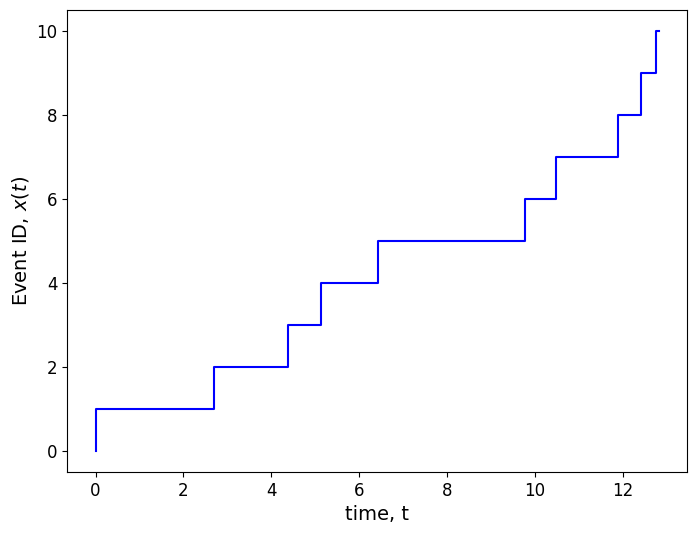

P = 
[[ 0.          0.        ]
 [ 2.68508095  1.        ]
 [ 4.37581741  2.        ]
 [ 5.12281497  3.        ]
 [ 6.42480326  4.        ]
 [ 9.76483058  5.        ]
 [10.47767736  6.        ]
 [11.88425187  7.        ]
 [12.41762127  8.        ]
 [12.75729038  9.        ]
 [12.83084627 10.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 10; mu = 2;
t = np.zeros(m+1); x = np.zeros(m+1)

for i in range(m):
   t[i+1] = t[i] - mu*np.log(np.random.random_sample())
   x[i+1] = x[i] + 1;

P = [t, x];

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.step(t, x,"b")
plt.xlabel("time, t",fontsize=14)
plt.ylabel("Event ID, $x(t)$",fontsize=14)
plt.show()

print("P = ")
print(np.transpose(P))

## Random Walk

A discrete random process of great interest is the random walk.

It is characterized by the increment or decrement of the signal by 1 at each time step.

In a general case, if the probability of progress is $p$, the probability of regression is $(1 – p)$.

There are several ways to implement the random walk, one of which is to permit variation in two dimensions, allowing the walk to vary in both horizontal and vertical directions.

## Example 9

When the path in each direction is equally likely, with the initial state $x(0) = 0$, the following possibilities are given below.

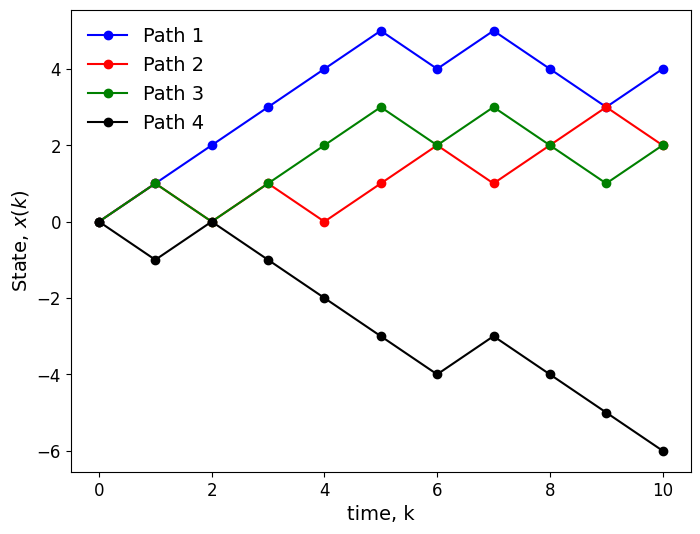

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5; N = 4; m = 10
t = np.zeros(m+1); x = np.zeros((N,m+1))

for k in range(N):
  for i in range(m):
    r = np.random.random_sample()
    if (r < p):
      x[k,i+1] = x[k,i] - 1
    else:
      x[k,i+1] = x[k,i] + 1
    t[i+1] = t[i] + 1;

# Figura
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, x[0,:],"bo-",label="Path 1")
plt.plot(t, x[1,:],"ro-",label="Path 2")
plt.plot(t, x[2,:],"go-",label="Path 3")
plt.plot(t, x[3,:],"ko-",label="Path 4")
plt.xlabel("time, k",fontsize=14)
plt.ylabel("State, $x(k)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.show()

# White Noise

A random walk requires two specifications: (i) the initial state and (ii) the recursive mechanism to reach the next state.

This type of process exhibits significant autocorrelation and contrasts with the concept of noise, which is an unpredictable signal unrelated to any other signal.

One can consider a noisy signal $W(k)$ in which the cross-correlation with the signal is $R_{wx}(τ) = E[W(k)X(k+τ)]$ and the autocorrelation $R_{ww}(τ)$ is constant and defined only at $τ = 0$.

For a discrete signal, $R_{ww}(0) = E[W2(k)]$ and in the case where the mean is zero $(μ_w = 0)$, it is called white noise.

The white noise time series is characterized by (i) $μw = 0$, (ii) $σ^2_w = \mathrm{constant}$, (iii) $R_{ww}(τ) = σ^2_wδ(τ)$ and (iv) $R_{xw}(τ) = R_{wx}(τ) = 0$.

There is no explicit formulation for white noise, and in the simulation of such a signal, one must only ensure total independence, as outlined in points (i) to (iv).

If a process is normalized to have a standard deviation of 2 and variance $4δ(τ)$, defined as $Z=\sqrt{-2 \ln (\mathrm{RND})} \cos (2 \pi \mathrm{RND})$ the process is Gaussian.

This noise creates a very realistic signal when added to another deterministic signal.

## Example 10

Consider the deterministic signal $x(k) = 2 \sin(6k)$ and study the signal resulting from the addition of an additive white Gaussian noise (AWGN) with $\sigma^2 = 4$.

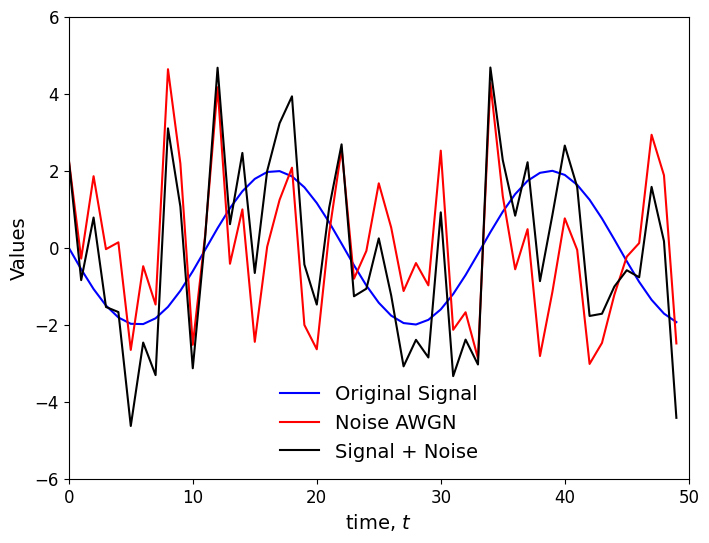

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50;
t = np.zeros(N); x1 = np.zeros(N); x2 = np.zeros(N);
w = np.zeros(N, dtype=float);

for k in range(N):
    t[k] = k;
    x1[k] = 2 * np.sin(6*k)
    w[k] = 2 * np.sqrt(-2*np.log(np.random.random_sample()))*np.cos(2*np.pi*np.random.random_sample())
    x2[k] = x1[k] + w[k]


# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, x1,"b-",label="Original Signal")
plt.plot(t, w,"r-",label="Noise AWGN")
plt.plot(t, x2,"k-",label="Signal + Noise")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel("Values",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -6, 6])
plt.show()

## Colored Noise

Another reason why white noise is important is that it can be used to generate many other random processes in addition to white noise itself.

Although white noise presents a time series with independent events, these other processes are not and are called colored noise.

A colored noise is characterized by its spectral density function $S_x(ω)$, which is the Fourier transform of the autocorrelation function $R_x(τ)$.

The main properties of the spectral density function are: (i) $S(ω) ≥ 0$; (ii) $S(ω) = S(-ω)$; (iii) The signal power between frequencies $a$ and $b$ is given by $\int_{a}^{b} S(\omega) d \omega$ and (iv) $S(ω) = 1$ for a white noise with unitary variance.

## Example 11

Determine the behavior of the spectral density function below for frequencies $-25 ≤ ω ≤ 25$, and $τ = [0.1, 0.2, 0.5, 1.0]$.

$$
S(\omega)=\frac{1}{1+\tau^{2} \omega^{2}}
$$

**Solution**:

One can note a spectral density function of a low-pass filter, in which the passband varies inversely with $τ$.

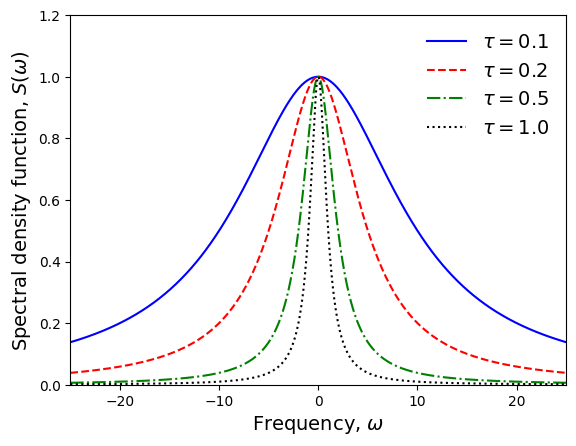

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

omega = np.arange(-25,25.01,0.01)
tau = np.array([0.1, 0.2, 0.5, 1.0])
S = np.zeros((len(tau),len(omega)))

for i in range(len(tau)):
   S[i,] = 1/(1+tau[i]**2*omega**2)

# Figura
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(omega,S[0,],"b-",label=r"$\tau = 0.1$")
plt.plot(omega,S[1,],"r--",label=r"$\tau = 0.2$")
plt.plot(omega,S[2,],"g-.",label=r"$\tau = 0.5$")
plt.plot(omega,S[3,],"k:",label=r"$\tau = 1.0$")
plt.xlabel("Frequency, $\omega$",fontsize=14)
plt.ylabel("Spectral density function, $S(\omega)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([-25, 25, 0, 1.2])
plt.show()

# Shaping Theorem

The function $S_x(ω)$ describes the theoretical frequency characteristics of $x(t)$, but only $X(k)$ is available. Note that from $x(k)$ one can obtain $S_x(ω)$, from $R_x(τ)$.

However, the inverse problem is not easy to solve.

The question of whether it would be possible to produce a time series from the density function and how this would be done is answered by the so-called Shaping Theorem:

**Shaping Theorem**: If $S_x(ω)$ is factorable in such a way that $S_x(ω) = H(s)H(-s)$, where $s = jω$, then $X(s) = H(s)W(s)$, where $X, H$ and $W$ are the Laplace transforms of $x(t)$, the impulse response
$h(t)$ and the unitary white noise $w(t)$.

## Example 12

Create an algorithm that generates a time series $x(k)$ with spectral density:

$$
S(\omega)=\frac{9}{\omega^{2}+4}
$$

Solution:
The first step is to factor the spectral density function and write it as a Laplace transform, where $s = jω$.

$$
S(\omega)=\frac{9}{\omega^{2}+4}=\frac{9}{4-s^{2}}=\left(\frac{3}{2+s}\right)\left(\frac{3}{2-s}\right)
$$

Thus, $H(s) = 3/(2+s)$, and we can write $X(s) = 3/(2+s)W(s)$ and from there, it follows that $sX(s) + 2 X(s) = 3 W(s)$. The inverse transform returns the signal to the time domain as follows:

$$ \dot{x}(t) +2x(t) = 3w(t)$$

Using Euler's method:

$$x(k+1) = x(k) + h[3w(t)-2x(k)]$$

Assuming a Gaussian distribution (white noise) with mean zero and variance 1:

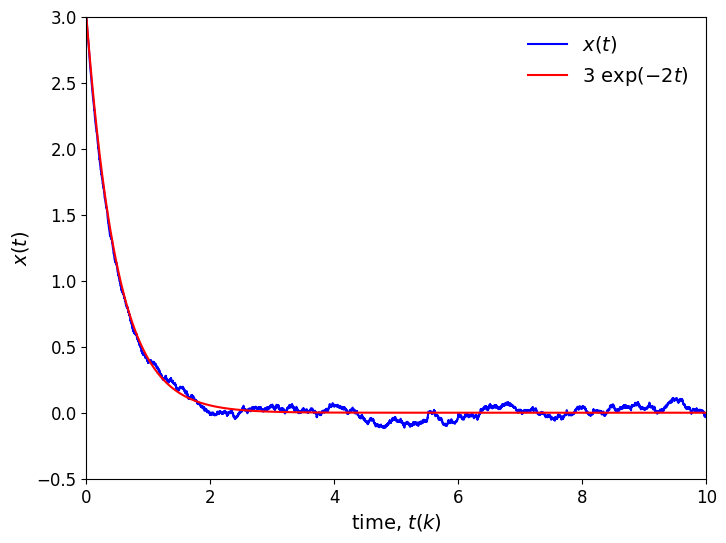

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000;
t = np.zeros(N); x = np.zeros(N); xt = np.zeros(N)
w = np.zeros(N)
x[0] = 3; xt[0] = 3
h = 0.001

# Euler method
for k in range(N - 1):
  w[k+1] = np.sqrt(-2*np.log(np.random.random_sample()))*np.cos(2*np.pi*np.random.random_sample())
  x[k+1] = x[k] + h * (3*w[k]  - 2*x[k])
  t[k+1] = t[k] + h
  xt[k+1]= 3*np.exp(-2*t[k+1])

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t,x,"b-",label=r"$x(t)$")
plt.plot(t,xt,"r-",label=r"$3~\exp(-2t)$")
plt.xlabel("time, $t(k)$",fontsize=14)
plt.ylabel("$x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 10, -0.5, 3])
plt.show()

#Confidence Interval

In the simulation process, primarily due to the random nature of some results, it is essential to define confidence intervals for the obtained results.

It is assumed that 10 replications of a given simulation were made with different seeds. For each replication, an output variable exhibited the following results: 45, 55, 67, 45, 68, 79, 98, 87, 84, 82. How do we obtain the confidence interval for a 95% confidence level? This concept means that we could say with 95% certainty that the real mean is within the calculated interval.

Therefore, to obtain a confidence interval, specific steps must be followed.

* Step 1: Obtain the mean μ and the standard deviation σ of the sample for the data. For the example, $μ = 71$ and $σ = 18.172$.
* Step 2: Subtract 1 from the sample size to get the degrees of freedom $\mathit{df}$. The sample size is 10, so $\mathit{df} = 9$.
* Step 3: Subtract the confidence level from 1 and divide by 2 to get the parameter α. For the example, $α = (1 – 0.95)/2 = 0.025$.
* Step 4: Look up $\mathit{df}$ and α in a **T** distribution table, as follows: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf, getting the value of 2.262. * Step 5: Divide your standard deviation by the square root of your sample size, $\sigma /\sqrt{10} = 18.172/3.1623 = 5.7465$
* Step 6: Obtain h by multiplying the result from Step 4 by the result from Step 5. Therefore, $h = 2.262 x 5.7465 = 12.9985$.
* Step 7: Obtain the lower and upper bounds of the interval by adding and subtracting $h$ from the mean. Therefore, the 95% confidence interval is $[μ – h, μ + h] = [71 - 12.9985, 71 + 12.9985] ≈ [58, 84]$.

## Exercises

1. Model a linear congruential generator (LCG) with $a = 13$, $c = 7$, and $m = 32$. a) Using $Z_0 = 9$, write a computer program to generate a sequence of uniformly distributed random numbers $U[0,1[$ and list the first 32 numbers in a table similar to what was done in Slide 6; b) Generate 100 of these random numbers defined by the LCG and obtain a table with 5 intervals of length equal to 0.2; c) Test the random numbers from the previous item for uniformity at the 5% and 10% significance levels using the Chi-square test; d) Implement the running tests on the data obtained in item b, acquiring the statistic $R$ and your conclusion.

2. Repeat Example 12 for a uniformly distributed noise with zero mean and variance 1.

# References


1.  SEVERANCE, F. L., System Modeling and Simulation, John Wiley & Sons, 2001.
2.  https://www.statisticshowto.com/probability-and-statistics/confidence-interval/#CISample2, Last access on Jun 26, 2025.

